In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [34]:
data = pd.read_csv("data_experiments.csv")
data.head()

,doc_id,url,cache,fulltext,nature,published,entity_name,entity_type,geo_path,extracted_text,...,événement,événementiel,être,île,îlot,œil,œuf,œuvre,œuvrer,ǐ
0,40369/749929d81bfa6b074fe6844e86b36dec643747bd...,https://sde09.fr/wp-content/uploads/2024/01/Bu...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,comm,2024-01-01 00:00:00,Syndicat départemental d'énergies de l'Ariège ...,Autre groupement,CC Vendée Grand Littoral/Vendée/Pays de la Loire,BULLETIN D'INFORMATION DU SYNDICAT DÉPARTEMENT...,...,0.000000,0.0,0.064461,0.000000,0.000000,0.00000,0.000000,0.005909,0.022182,0.0
1,2702/19edd8d6b29dcafcb309e0997ddfaef8cca75422_...,https://www.cc-paysdelimours.fr/files/CCPL-202...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,comm,2021-08-22 00:00:00,CC du Pays de Limours (CCPL),Intercommunalité,CC du Pays de Limours (CCPL)/Essonne/Île-de-Fr...,Communauté de communes du Pays de Limours PCAE...,...,0.011364,0.0,0.057979,0.007830,0.003305,0.00000,0.000000,0.030462,0.000000,0.0
2,4172/0bf2fa62554e88e675252e51c5720d874aea4c5d_...,https://www.mairie-orly.fr/content/download/16...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,comm,2024-03-21 00:00:00,Orly,Commune,Orly/Métropole du Grand Paris (94)/Val-de-Marn...,AccessDeniedAccess Denied.tx2fe52a9984db4526a1...,...,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
3,2774/25ae7_DEL-2022-199_Annexe_Bilan_dactivite...,https://www.grandannecy.fr/fileadmin/mediatheq...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,comm,2022-09-01 00:00:00,CA du Grand Annecy,Intercommunalité,CA du Grand Annecy/Haute-Savoie/Auvergne-Rhône...,H O T E L SOM MAIRE P. 4 administration généra...,...,0.000000,0.0,0.098685,0.003382,0.003808,0.00000,0.000000,0.037831,0.000000,0.0
4,6472/022f3bc3b0e35408bde88d61f3049899113f21e0_...,https://ville-somain.fr/wp-content/uploads/202...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,comm,2021-10-01 00:00:00,Somain,Commune,Somain/CC Cœur d'Ostrevent/Nord/Hauts-de-France,N°42 SEPTEMBRE-OCTOBRE 2020 Création de la bal...,...,0.000000,0.0,0.091322,0.000000,0.008306,0.02282,0.011283,0.000000,0.000000,0.0


In [35]:
data["cache"].to_list()

['https://datapolitics-public.s3.gra.io.cloud.ovh.net/LORIA/40369/749929d81bfa6b074fe6844e86b36dec643747bd_Bulletin-Lumiere',
 'https://datapolitics-public.s3.gra.io.cloud.ovh.net/LORIA/2702/19edd8d6b29dcafcb309e0997ddfaef8cca75422_1PCAET-CCPL-Diag',
 'https://datapolitics-public.s3.gra.io.cloud.ovh.net/LORIA/4172/0bf2fa62554e88e675252e51c5720d874aea4c5d_ABROGATION+ARRET',
 'https://datapolitics-public.s3.gra.io.cloud.ovh.net/LORIA/2774/25ae7_DEL-2022-199_Annexe_Bilan_dactivite_2021_du_Grand_Annecy.pdf',
 'https://datapolitics-public.s3.gra.io.cloud.ovh.net/LORIA/6472/022f3bc3b0e35408bde88d61f3049899113f21e0_la_vie_som_sept_',
 'https://datapolitics-public.s3.gra.io.cloud.ovh.net/LORIA/4690/90c8c_st-barth_infos_no11-1.pdf',
 'https://datapolitics-public.s3.gra.io.cloud.ovh.net/LORIA/2951/c421b60feb8ece37b39e70d3c7fb36c672570bac_2022-12-15_PCAET',
 'https://datapolitics-public.s3.gra.io.cloud.ovh.net/LORIA/2153/ab79db8dc15f86afbbd38a7fd7b4bc33906df02b_LIEN_2_-_Scenari',
 'https://datapo

In [4]:
def check_len(text):
    
    text = str(text)
    splits = text.split(" ")
    length = len(splits)
    
    return length

In [5]:
data["naive_length"] = data["extracted_text"].apply(check_len)

In [6]:
cols = ["extracted_text", "entity_type", "nature", "naive_length"]
data_filter = data[cols]
data_filter.head()

,extracted_text,entity_type,nature,naive_length
0,Annexe – bilan de la concertation et les proje...,Commune,dlao.plu,341
1,COMMUNE DE MOUTIERS-LES-MAUXFAITS PRODUCTION D...,Intercommunalité,dlao.plu,901
2,"EDITO Comme chaque année, Anjou Bleu Communaut...",Intercommunalité,comm,3541
3,Dossier de presse 2024 Grenoble 2024 : transit...,Commune,comm,6476
4,VOTRE MAGAZINE MUNICIPAL JUIN 2024 UN NOUVEAU ...,Commune,comm,8952


In [7]:
data_filter.dtypes

extracted_text    object
entity_type       object
nature            object
naive_length       int64
dtype: object

In [8]:
data_filter["nature"].value_counts()

nature
dlao.plu    4
comm        4
Name: count, dtype: int64

In [9]:
data_filter["entity_type"].value_counts()

entity_type
Commune             5
Intercommunalité    3
Name: count, dtype: int64

## Analyzing Document Length

In [10]:
data_filter["naive_page_num"] = data_filter["naive_length"] / 500

C:\Users\alber\AppData\Local\Temp\ipykernel_15120\1644821041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter["naive_page_num"] = data_filter["naive_length"] / 500


In [11]:
data_filter["naive_length"]

0      341
1      901
2     3541
3     6476
4     8952
5    11728
6    17357
7    43050
Name: naive_length, dtype: int64

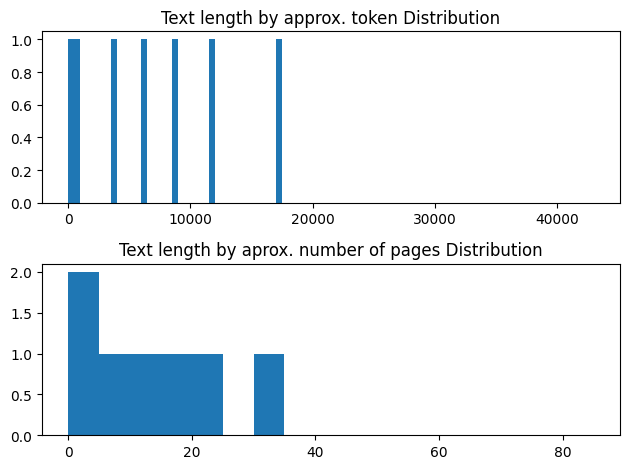

In [12]:
fig, ax = plt.subplots(2, 1)

ax[0].hist(data_filter["naive_length"], 
        bins=np.arange(0, 
                        data_filter["naive_length"].max(), 
                        500)
        )
ax[0].set_title("Text length by approx. token Distribution")

######################

ax[1].hist(data_filter["naive_page_num"], 
        bins=np.arange(0, 
                        data_filter["naive_page_num"].max(), 
                        5)
        )
ax[1].set_title("Text length by aprox. number of pages Distribution")

fig.tight_layout()
plt.show()

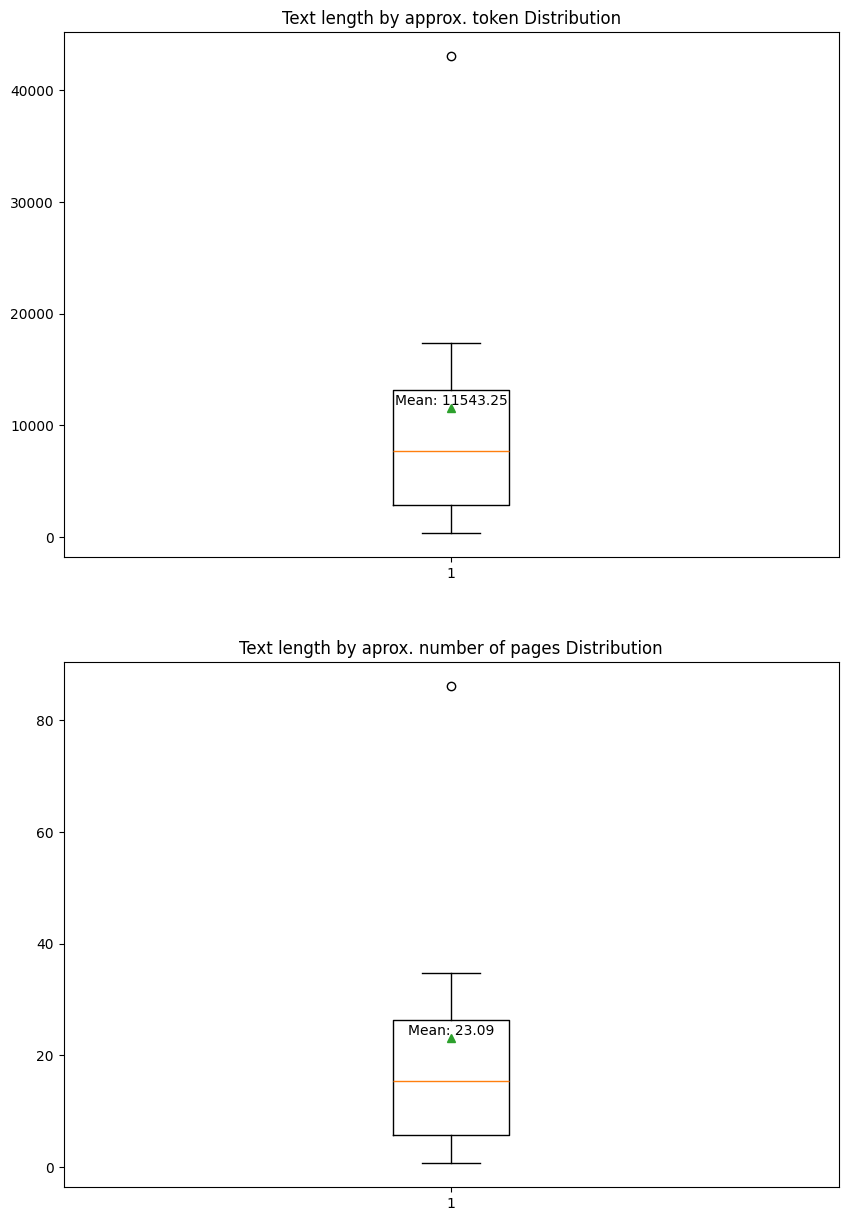

In [13]:
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(10, 15, forward=True)

Q1 = np.percentile(data_filter["naive_length"], 25, axis=0)
Q3 = np.percentile(data_filter["naive_length"], 75, axis=0)
mean = np.mean(data_filter["naive_length"])

ax[0].boxplot(data_filter["naive_length"], showmeans=True, showcaps=True)

ax[0].annotate(f"Mean: {round(mean, 2)}", 
                (1, mean), 
                ha='center', va='bottom')

ax[0].set_title("Text length by approx. token Distribution")

######################

Q1 = np.percentile(data_filter["naive_page_num"], 25, axis=0)
Q3 = np.percentile(data_filter["naive_page_num"], 75, axis=0)
mean = np.mean(data_filter["naive_page_num"])

ax[1].boxplot(data_filter["naive_page_num"], showmeans=True, showcaps=True)

ax[1].annotate(f"Mean: {round(mean, 2)}", 
                (1, mean), 
                ha='center', va='bottom')

ax[1].set_title("Text length by aprox. number of pages Distribution")


# fig.tight_layout()
plt.show()

In [14]:
data_filter.columns

Index(['extracted_text', 'entity_type', 'nature', 'naive_length',
       'naive_page_num'],
      dtype='object')

In [15]:
data_filter.pivot_table(values="naive_length", index=["nature"]).apply(lambda x: round(x))

,naive_length
nature,
comm,7674.0
dlao.plu,15412.0


In [16]:
data_filter.pivot_table(values="naive_length", index=["entity_type"]).apply(lambda x:round(x))

,naive_length
entity_type,
Commune,8971.0
Intercommunalité,15831.0


In [17]:
data_filter.pivot_table(values="naive_length", index=["entity_type"], columns=["nature"]).apply(lambda x:round(x))

nature,comm,dlao.plu
entity_type,,
Commune,9052.0,8849.0
Intercommunalité,3541.0,21976.0


## Sampling

Given that we cannot manually check that much data, we are just going to sample one document every ascending quantile of 12.5. In total, we will have 8 docs of ascending length.

In [18]:
data_to_annotate = pd.DataFrame(columns=data.columns)

In [19]:
ranges_quantiles = list(np.arange(0, 1, (1/8))) + [1]

In [20]:
ranges_quantiles

[np.float64(0.0),
 np.float64(0.125),
 np.float64(0.25),
 np.float64(0.375),
 np.float64(0.5),
 np.float64(0.625),
 np.float64(0.75),
 np.float64(0.875),
 1]

In [21]:
lower_bound_value = data["naive_length"].quantile(ranges_quantiles[1])
lower_bound_value

np.float64(831.0)

In [26]:
data.columns

Index(['Index', 'doc_id', 'url', 'cache', 'fulltext', 'nature', 'published',
       'entity_name', 'entity_type', 'geo_path', 'extracted_text',
       'naive_length'],
      dtype='object')

In [33]:
data["cache"].to_list()

['https://datapolitics-public.s3.gra.io.cloud.ovh.net/LORIA/1944/af78ade6b29b3934a8eb5591bfb584d535f3fca8_19-LAV53DA24DCM0',
 'https://datapolitics-public.s3.gra.io.cloud.ovh.net/LORIA/2087/372784ba70ba9e30dae2962d07359f76ebb8a162_ZAEnR_Fiche-comm',
 'https://datapolitics-public.s3.gra.io.cloud.ovh.net/LORIA/2691/2f21df2f6285cf23ffed3cc5aaf9cea23c37674f_Anjou-Bleu-Com-7',
 'https://datapolitics-public.s3.gra.io.cloud.ovh.net/LORIA/57/84c75222e4da1c472a7b8a68e5c9b3fabe8c208b_1835_369_DP-voeu',
 'https://datapolitics-public.s3.gra.io.cloud.ovh.net/LORIA/4957/030656d023e627e0a223d7c0a7ac8eae1d8fa1dd_Maquette-ZOOM-2e',
 'https://datapolitics-public.s3.gra.io.cloud.ovh.net/LORIA/3452/b7f804c6459ddf796d1adb95495c837d0235bba9_BM_octobre2023_B',
 'https://datapolitics-public.s3.gra.io.cloud.ovh.net/LORIA/4429/5b0cc4b420331c1f97b20169e04baaa81a495023_1.1-Diag-justifi',
 'https://datapolitics-public.s3.gra.io.cloud.ovh.net/LORIA/3065/9ef933dd7bf6c5090deb1acfaff5a9d9212d5b77_5.1_VNI200016_SP']

To avoid text that are way too short and not representative of the shorter data, we are going to set the minimun length to 300.

In [22]:
min_len = 300

In [24]:
# indexes = []

# i = 0
# while i < len(ranges_quantiles) - 1:
    
#     lower_bound = ranges_quantiles[i]
#     upper_bound = ranges_quantiles[i + 1]
    
#     lower_bound_value = data["naive_length"].quantile(lower_bound)
#     upper_bound_value = data["naive_length"].quantile(upper_bound)
#     # print("Length between", lower_bound_value, upper_bound_value)
    
#     data_in_range = data[(data["naive_length"] > lower_bound_value) 
#                         & (data["naive_length"] < upper_bound_value) 
#                         & (data["naive_length"] > min_len)]
#     # print(data_in_range)
    
#     data_sample = data_in_range.sample(1, random_state=40)
#     index = data_sample.index
    
#     indexes.append(index)
#     data_to_annotate = pd.concat([data_to_annotate, data_sample], axis=0)
    
#     i = i + 1

In [25]:
data_to_annotate

,Index,doc_id,url,cache,fulltext,nature,published,entity_name,entity_type,geo_path,extracted_text,naive_length


In [57]:
data_to_annotate.columns

Index(['doc_id', 'url', 'cache', 'fulltext', 'nature', 'published',
       'entity_name', 'entity_type', 'geo_path', 'extracted_text',
       'embeddings', 'typed_embeddings', 'km_cluster_labels',
       'llama3:1b_llm_is_project', 'naive_length'],
      dtype='object')

In [58]:
data_to_annotate = data_to_annotate[['doc_id', 'url', 'cache', 'fulltext', 'nature', 'published',
    'entity_name', 'entity_type', 'geo_path', 'extracted_text',
    'naive_length']]

In [59]:
indexes

[Index([6374], dtype='int64'),
 Index([8261], dtype='int64'),
 Index([9502], dtype='int64'),
 Index([9316], dtype='int64'),
 Index([8812], dtype='int64'),
 Index([8531], dtype='int64'),
 Index([7744], dtype='int64'),
 Index([7625], dtype='int64')]

In [60]:
data_to_annotate.to_csv("data_to_manually_annotate.csv", index=indexes, index_label="Index")

In [61]:
import pandas as pd

df = pd.read_csv("data_to_manually_annotate.csv")
df.head()

,Index,doc_id,url,cache,fulltext,nature,published,entity_name,entity_type,geo_path,extracted_text,naive_length
0,6374,1944/af78ade6b29b3934a8eb5591bfb584d535f3fca8_...,https://www.laval.fr/fileadmin/documents/Docum...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,dlao.plu,2024-03-04 00:00:00,Laval,Commune,Laval/CA Laval Agglomération/Mayenne/Pays de l...,Annexe – bilan de la concertation et les proje...,341
1,8261,2087/372784ba70ba9e30dae2962d07359f76ebb8a162_...,https://www.vendeegrandlittoral.fr/medias/2024...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,dlao.plu,2024-06-01 00:00:00,CC Vendée Grand Littoral,Intercommunalité,CC Vendée Grand Littoral/Vendée/Pays de la Loire,COMMUNE DE MOUTIERS-LES-MAUXFAITS PRODUCTION D...,901
2,9502,2691/2f21df2f6285cf23ffed3cc5aaf9cea23c37674f_...,https://www.anjoubleucommunaute.fr/medias/2024...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,comm,2024-04-15 00:00:00,CC Anjou Bleu Communauté,Intercommunalité,CC Anjou Bleu Communauté/Maine-et-Loire/Pays d...,"EDITO Comme chaque année, Anjou Bleu Communaut...",3541
3,9316,57/84c75222e4da1c472a7b8a68e5c9b3fabe8c208b_18...,https://www.grenoble.fr/uploads/Externe/da/183...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,comm,2023-04-03 00:00:00,Grenoble,Commune,Grenoble/Grenoble-Alpes-Métropole/Isère/Auverg...,Dossier de presse 2024 Grenoble 2024 : transit...,6476
4,8812,4957/030656d023e627e0a223d7c0a7ac8eae1d8fa1dd_...,https://www.mairie-eaunes.fr/eaunes/wp-content...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,comm,2024-04-11 00:00:00,Eaunes,Commune,Eaunes/CA Le Muretain Agglo/Haute-Garonne/Occi...,VOTRE MAGAZINE MUNICIPAL JUIN 2024 UN NOUVEAU ...,8952
